In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import json

from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas
print(f"Available datasets: {list(dataset_recipes.keys())}")

import warnings 
warnings.simplefilter("ignore")
# mxnet.__version__

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5']


/anaconda3/envs/sori_torch/lib/python3.7/site-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [2]:
class Dataset:
    def __init__(self,name):
        print("start")
        self.name = name
        self.list_data = list(dataset_recipes.keys())
    
    def load(self, regenerate=True):
        if self.name in self.list_data:
            data  = get_dataset(self.name, regenerate=regenerate)
            return data
        else:
            print("Not found Data...")
            return None
    
    @property
    def meta_data(self):
        dataset = self.load(regenerate=False)
#         print(f"Length of forecasting window in test dataset: {len(test_series) - len(train_series)}")
        print(f"Recommended prediction horizon: {dataset.metadata.prediction_length}")
        print(f"Frequency of the time series: {dataset.metadata.freq}")
        

ds = Dataset("m4_hourly")
dataset = ds.load(regenerate=False)
dataset

start


TrainDatasets(metadata=MetaData(freq='H', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='414')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=48), train=<gluonts.dataset.common.FileDataset object at 0x12afa5b50>, test=<gluonts.dataset.common.FileDataset object at 0x128c3f2d0>)

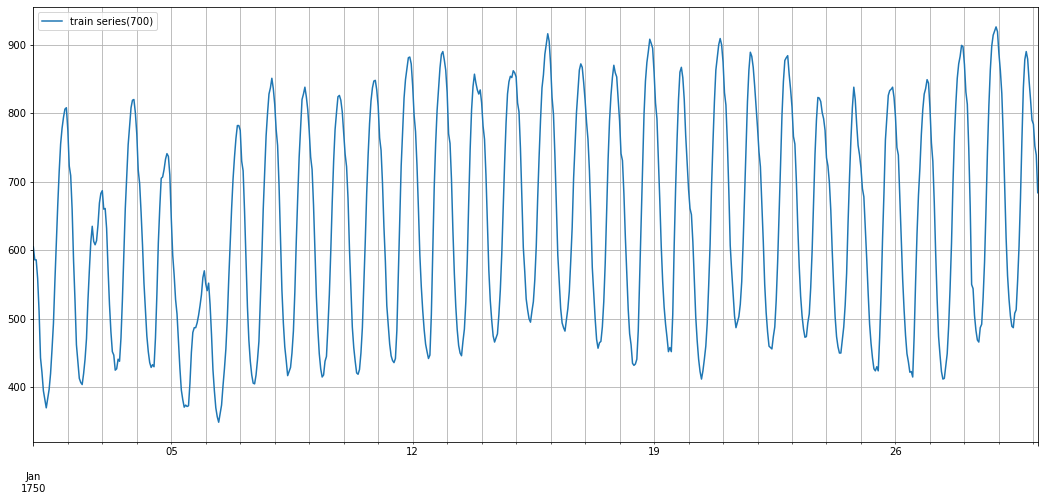

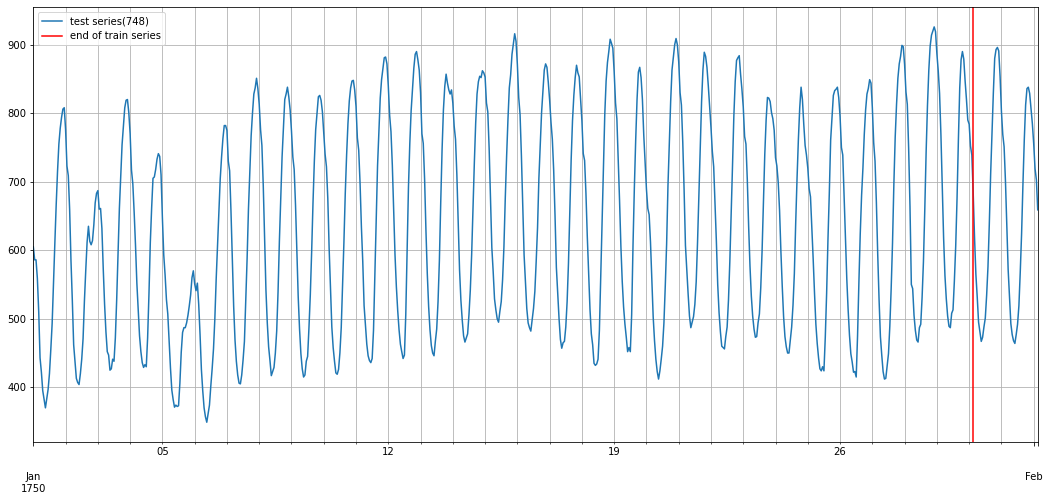

In [3]:
def plot_ts(dataset,cate="train"):
    train_entry = next(iter(dataset.train))
    test_entry = next(iter(dataset.test))
    
    train_series = to_pandas(train_entry)
    test_series = to_pandas(test_entry)
    f,ax = plt.subplots(figsize=(18,8))
    if cate=="train":
        train_series.plot(ax=ax)
        plt.grid(which="both")
        plt.legend([f"train series({len(train_series)})"], loc="upper left")
        plt.show()
    if cate=="test":
        test_series.plot()
        plt.axvline(train_series.index[-1], color='r') # end of train dataset
        plt.grid(which="both")
        plt.legend([f"test series({len(test_series)})", "end of train series"], loc="upper left")
        plt.show()
    return 

plot_ts(dataset,cate="train")
plot_ts(dataset,cate="test")

In [4]:
ds.meta_data

Recommended prediction horizon: 48
Frequency of the time series: H


In [12]:
import sys,os
sys.path.append("/Users/soriiieee/work2/stock/py")
from utils_data import check_cate #(cate="name17") 
from utils_data import check_com #(col=col,name =name,n=20)
import glob
#['market', 'name33', 'name17', 'num_size']
check_cate("name17")

--------------- name17 ---------------
['食品(137)', '-(345)', '商社・卸売(317)', '建設・資材(311)', '鉄鋼・非鉄(79)', 'エネルギー資源(17)', '情報通信・サービスその他(1133)', '機械(230)', '医薬品(72)', '不動産(142)', '運輸・物流(119)', '金融（除く銀行）(89)', '小売(343)', '素材・化学(289)', '電機・精密(293)', '自動車・輸送機(110)', '銀行(81)', '電力・ガス(24)']


In [14]:
col="name17"
name = "素材・化学"
# check_com(col,name, n=30, download=False)

def load_stock(col,name):
    _path = glob.glob("/Users/soriiieee/work2/stock/out/ts1/name17/素材・化学/*.csv")
    _file = [ os.path.basename(p) for p in _path]
#     [ print(f) for f in _file ]
    _t = [ c.split(".")[0].split("_")[0] for c in _file ]
    _n= [ c.split(".")[0].split("_")[1] for c in _file ]
    
def load_fundamental(col,name, yy="2020"):
    DIR="/Users/soriiieee/work2/stock/dat/fundamental/origin/master"
    path = f"{DIR}/
    return 
    

load_stock(col,name)
    

3001_片倉工業.csv
3201_日本毛織.csv
3408_サカイオーベックス.csv
3109_シキボウ.csv
3104_富士紡ホールディングス.csv
3551_ダイニック.csv
3402_東レ.csv
3106_倉敷紡績.csv
3405_クラレ.csv
3553_共和レザー.csv
3002_グンゼ.csv
3569_セーレン.csv
3529_アツギ.csv
3123_サイボー.csv
3512_日本フエルト.csv
3501_住江織物.csv
3513_イチカワ.csv
3407_旭化成.csv
3103_ユニチカ.csv
3101_東洋紡.csv
3401_帝人.csv
3571_ソトー.csv
3202_ダイトウボウ.csv
3204_トーア紡コーポレーション.csv
3577_東海染工.csv
3205_ダイドーリミテッド.csv
3524_日東製網.csv
3409_北日本紡績.csv
3302_帝国繊維.csv
3111_オーミケンシ.csv


In [7]:
class CuntomDataset:
    def __init__(self,ticker,name,nation):
        self.name = name
        self.ticker = ticker
        self.nation = nation
    
    def load(self):
        return 
    
    
        